# Heroes of Pymoli
Welcome back! The purpose of this Jupyter notebook is to use Python/Pandas to analyze data 
on current players who play "Heroes of Pymoli".

## Methods
As a gaming data analyst, you want determine:

- Total Number of Players
- Total Revenue (accumulated from item purchases in the game)

Based on players who identify as M, F, or Other / Non-Disclosed:
- which group is likely to play this game
- which group is most likely to purchase an item, and at what price 

Based on the players' age group: 
- at which age group is the player in that is likely to play the game
- at which age group is the player in likely to buy an item, and at what price

- Players who spends the most amount in the game, including number of purchases
- Popular items in the game and their numbers of purchases
- Popular items by total purchase value (revenue)
 

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# load file 
file = "Resources/purchase_data.csv"

# read csv file in pandas 
purchase_data = pd.read_csv(file)

# store data into panda dataframe 
purchase_df = pd.DataFrame(purchase_data)

# check dataframe
purchase_df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Total Number of Players

In [2]:
# create summary table of unique counts for each column 
unique_counts = purchase_df.nunique(axis=0)

# display summary table
unique_counts

Purchase ID    780
SN             576
Age             39
Gender           3
Item ID        183
Item Name      179
Price          145
dtype: int64

In [3]:
# create a variable for unique player counts
unique_players = unique_counts["SN"]

# verify unique player count 
unique_players

576

In [4]:
# create new summary table
player_table = pd.DataFrame({"Total Players": [unique_players]})

# display total players
player_table

,Total Players
0,576


##  Total Item purchases and revenue

In [5]:
# generate variable for purchase total from previous table 
purchase_total = unique_counts["Purchase ID"]

# verify total purchases 
purchase_total

780

In [6]:
# generate the sum by the calculating the length of unique items 
items_total = unique_counts["Item Name"]

# verify unique items 
items_total

179

In [7]:
# generate average price from Price column using mean function 
average_price = purchase_df['Price'].mean()

# verify average price
print(average_price)

# generate total revenue from Price column by using sum function 
total_price = purchase_df['Price'].sum()

# verify total price
print(total_price)

3.050987179487176
2379.77


In [8]:
# create new summary table
purchasing_analysis = pd.DataFrame({"Number of Unique Items": [items_total], 
                                  "Average Price": [average_price],
                                  "Number of Purchases": [purchase_total],
                                  "Total Revenue": [total_price]
                                 })

# use mapping to convert add $ to Average Price and Total Revenue 
purchasing_analysis["Average Price"] = purchasing_analysis["Average Price"].map("${:.2f}".format)
purchasing_analysis["Total Revenue"] = purchasing_analysis["Total Revenue"].map("${:,}".format)

# display summary table
purchasing_analysis

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender distribution 

In [9]:
# create new DataFrame that dropped "SN" duplicates to generate correct gender count
cleaned_df = purchase_df.drop_duplicates(subset="SN", keep='first', inplace=False)

# generate gender counts 
grouped_gender_counts = cleaned_df["Gender"].value_counts()
grouped_gender_counts

Male                     484
Female                    81
Other / Non-Disclosed     11
Name: Gender, dtype: int64

In [10]:
# generate total sum of gender
gender_count = purchase_df["Gender"].count()

# calculate percentage of players for each gender 
percentage = (grouped_gender_counts / gender_count)*100

# round value to 2 decmials
gender_percent = round(percentage, 2)

# verify gender percentage values 
gender_percent

Male                     62.05
Female                   10.38
Other / Non-Disclosed     1.41
Name: Gender, dtype: float64

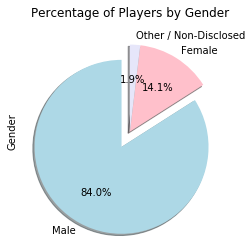

In [11]:
# let's visualize the gender distribution of players using a pie chart

colors = ["lightblue", "pink", "lavender"]
explode = [0.2, 0, 0]

# create pie chart using plot function 
gender_percent.plot(kind="pie", autopct="%1.1f%%", explode=explode, colors=colors, shadow=True, startangle=90)

# add labels and show pie chart 
plt.title("Percentage of Players by Gender")

# save figure to Images folder 
plt.savefig("Images/gender_percent.png")
plt.show()

In [12]:
# create new summary table 
gender_summary_table = pd.DataFrame({"Total Count": grouped_gender_counts, 
                            "Percentage of Players": gender_percent,
                            })

# display results  
gender_summary_table

,Total Count,Percentage of Players
Male,484,62.05
Female,81,10.38
Other / Non-Disclosed,11,1.41


## Gender-based Item purchases and prices

In [13]:
# create new DataFrame from data file 
new_purchase_df = pd.DataFrame(purchase_data)

# group table by Gender 
grouped_gender_df = new_purchase_df.groupby(["Gender"])

# verify grouping 
grouped_gender_df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58
15,15,Lisassa64,21,Female,98,"Deadline, Voice Of Subtlety",2.89
18,18,Reunasu60,22,Female,82,Nirvana,4.90
22,22,Siarithria38,38,Other / Non-Disclosed,24,Warped Fetish,3.81
38,38,Reulae52,10,Female,116,Renewed Skeletal Katana,4.18


In [14]:
# generate number of purchases for each gender 
gender_purchase_count = grouped_gender_df["Purchase ID"].count()

# verify purchases
gender_purchase_count

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64

In [15]:
# generate total purchase value 
total_purchase_value = grouped_gender_df["Price"].sum()

# verify total purchase value
total_purchase_value 

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [16]:
# generate average purchase price 
mean_price_by_gender = grouped_gender_df["Price"].mean()

# verify average 
mean_price_by_gender

Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64

In [17]:
# generate average total purchases per person 
average_total_per_person = total_purchase_value / grouped_gender_counts

# verify average per person
average_total_per_person

Female                   4.468395
Male                     4.065372
Other / Non-Disclosed    4.562727
dtype: float64

In [18]:
# create new summary table to show results 
gender_purchasing_summary = pd.DataFrame({"Purchase Count": gender_purchase_count,
                            "Average Purchase Price": mean_price_by_gender, 
                            "Total Purchase Value": total_purchase_value, 
                           "Avg Total Purchase Per Person": average_total_per_person})

# use mapping to add $ to Average Purchase Price, Total Purchase Value, Avg Total Purchase Per Person
gender_purchasing_summary["Average Purchase Price"] = gender_purchasing_summary["Average Purchase Price"].map("${:.2f}".format)
gender_purchasing_summary["Total Purchase Value"] = gender_purchasing_summary["Total Purchase Value"].map("${:,.2f}".format)
gender_purchasing_summary["Avg Total Purchase Per Person"] = gender_purchasing_summary["Avg Total Purchase Per Person"].map("${:.2f}".format)

# display results
gender_purchasing_summary


,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase Per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age distribution

In [19]:
# check max and min age using previous DataFrame (cleaned_df) that dropped duplicates
max_age = cleaned_df["Age"].max()
print(max_age)

min_age = purchase_df["Age"].min()
print(min_age)

# select "Age" column from previous DataFrame to perform age demographics
player_ages_df = cleaned_df.loc[:, ["Age"]]

# create bins for to store age groups 
bins = [0, 10, 15, 20, 25, 30, 35, 40, np.inf]

# age titles of range
age_group = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# add a new column to include bins called "Age Group" to DataFrame
player_ages_df["Age Group"] = pd.cut(player_ages_df["Age"], bins, labels=age_group, right=False)
player_ages_df.head()

45
7


,Age,Age Group
0,20,20-24
1,40,40+
2,24,20-24
3,24,20-24
4,23,20-24


In [20]:
# determine the counts for each "Age Group"
age_group_count = player_ages_df["Age Group"].value_counts()

# verify counts
age_group_count

20-24    258
15-19    107
25-29     77
30-34     52
35-39     31
10-14     22
<10       17
40+       12
Name: Age Group, dtype: int64

In [21]:
# determine the percentage of age groups that play the game, use unique_players string from first summary table 
age_percentage = (age_group_count / unique_players) * 100

# verify percentage
age_percentage

20-24    44.791667
15-19    18.576389
25-29    13.368056
30-34     9.027778
35-39     5.381944
10-14     3.819444
<10       2.951389
40+       2.083333
Name: Age Group, dtype: float64

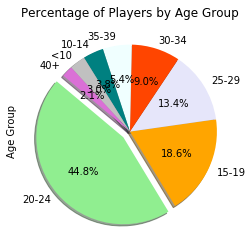

In [43]:
# let's visualize the distribution of players by age group using a pie chart
colors = ["lightgreen", "orange", "lavender", "orangered", "azure", "teal", "silver", "orchid"]
explode = [0.1, 0, 0, 0, 0, 0, 0, 0]

# create pie chart using plot function 
age_percentage.plot(kind="pie", autopct="%1.1f%%", explode=explode, colors=colors, shadow=True, startangle=140)

# add labels, save pie chart 
plt.title("Percentage of Players by Age Group")
plt.savefig("Images/age_group_percentages.png")
plt.show()

In [23]:
# create summary table to display results
age_group_summary = pd.DataFrame({
    "Total Count": age_group_count, 
    "Percentage of Players": age_percentage
})

age_group_summary["Percentage of Players"] = age_group_summary["Percentage of Players"].map("{:.2f}".format)
age_group_summary

,Total Count,Percentage of Players
20-24,258,44.79
15-19,107,18.58
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
10-14,22,3.82
<10,17,2.95
40+,12,2.08


## Age-based Item purchases and prices

In [24]:
# create new DataFrame from data file 
age_df = pd.DataFrame(purchase_data)

# create bins for to store age groups 
bins = [0, 10, 15, 20, 25, 30, 35, 40, np.inf]

# age titles of ranges
age_group = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# create a new column to store bins 
age_df["Age Group"] = pd.cut(age_df["Age"], bins, labels=age_group, right=False)

# verify new column
age_df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Group
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24


In [25]:
# sort DataFrame by "Age Group" column 
age_df_sorted = age_df.groupby(["Age Group"])

# verify sorting
age_df_sorted

In [26]:
# calculate total purchases 
age_purchase_count = age_df_sorted["Item ID"].count()

# verify purchase count 
age_purchase_count

Age Group
<10       23
10-14     28
15-19    136
20-24    365
25-29    101
30-34     73
35-39     41
40+       13
Name: Item ID, dtype: int64

In [27]:
# calculate average purchase price 
age_avg_purchase_price = age_df_sorted["Price"].mean()

# verify average purchase price
age_avg_purchase_price

Age Group
<10      3.353478
10-14    2.956429
15-19    3.035956
20-24    3.052219
25-29    2.900990
30-34    2.931507
35-39    3.601707
40+      2.941538
Name: Price, dtype: float64

In [28]:
# generate total purchase
age_total_purchase = age_df_sorted["Price"].sum()

# verify total purchase
age_total_purchase

Age Group
<10        77.13
10-14      82.78
15-19     412.89
20-24    1114.06
25-29     293.00
30-34     214.00
35-39     147.67
40+        38.24
Name: Price, dtype: float64

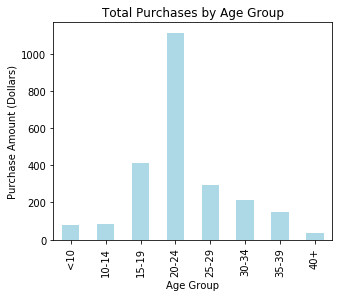

In [29]:
# let's visualize the purchases by age group using a bar graph 
age_bar = age_total_purchase.plot(kind="bar", facecolor="lightblue", figsize=(5,4))

# add labels and show pie chart 
plt.title("Total Purchases by Age Group")
plt.ylabel("Purchase Amount (Dollars)")
plt.show()

In [30]:
# calculate average purchase per person
age_total_per_person = age_total_purchase / age_group_count

# verify average
age_total_per_person

10-14    3.762727
15-19    3.858785
20-24    4.318062
25-29    3.805195
30-34    4.115385
35-39    4.763548
40+      3.186667
<10      4.537059
dtype: float64

In [31]:
# create new summary 
age_purchasing_summary = pd.DataFrame({"Purchase Count": age_purchase_count,
                            "Average Purchase Price": age_avg_purchase_price, 
                            "Total Purchase Value": age_total_purchase, 
                           "Avg Total Purchase Per Person": age_total_per_person})
# add $ and comma to price
age_purchasing_summary["Average Purchase Price"] = age_purchasing_summary["Average Purchase Price"].map("${:.2f}".format)
age_purchasing_summary["Total Purchase Value"] = age_purchasing_summary["Total Purchase Value"].map("${:,.2f}".format)
age_purchasing_summary["Avg Total Purchase Per Person"] = age_purchasing_summary["Avg Total Purchase Per Person"].map("${:.2f}".format)


# display results
age_purchasing_summary

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase Per Person
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19
<10,23,$3.35,$77.13,$4.54


## Top spenders 

In [32]:
# create new DataFrame from file 
spending_df = pd.DataFrame(purchase_data)

# group DataFrame by player's SN
top_spender = spending_df.groupby(["SN"])
top_spender

In [33]:
# calculate total purchase price
top_total_purchase = top_spender["Price"].sum() 

# verify total purchase price
top_total_purchase.head()

SN
Adairialis76    2.28
Adastirin33     4.48
Aeda94          4.91
Aela59          4.32
Aelaria33       1.79
Name: Price, dtype: float64

In [34]:
# calculate purchase count 
top_purchase_count = top_spender["Purchase ID"].count()

# verify purchase count
top_purchase_count.head()

SN
Adairialis76    1
Adastirin33     1
Aeda94          1
Aela59          1
Aelaria33       1
Name: Purchase ID, dtype: int64

In [35]:
# calculate average purchase price
top_avg_purchase = (top_total_purchase / top_purchase_count) 

# verify average purchase price
top_avg_purchase.head()

SN
Adairialis76    2.28
Adastirin33     4.48
Aeda94          4.91
Aela59          4.32
Aelaria33       1.79
dtype: float64

In [36]:
# create new summary 
spender_df = pd.DataFrame({"Purchase Count": top_purchase_count,
                           "Average Purchase Price": top_avg_purchase,
                           "Total Purchase Value": top_total_purchase
                                   })

# add $ and comma to price
spender_df["Average Purchase Price"] = spender_df["Average Purchase Price"].map("${:.2f}".format)
spender_df["Total Purchase Value"] = spender_df["Total Purchase Value"].map("${:.2f}".format)

# sort values by highest purchase count 
top_spender_summary = spender_df.sort_values(["Purchase Count"], ascending=False)

# display results
top_spender_summary.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Iral74,4,$3.40,$13.62
Idastidru52,4,$3.86,$15.45
Asur53,3,$2.48,$7.44
Inguron55,3,$3.70,$11.11


## Most Popular Items and purchases

In [37]:
# create new DataFrame from file 
reset_df = pd.DataFrame(purchase_data)

# group DataFrame by Item ID and Item Name 
items_df = reset_df.groupby(["Item ID", "Item Name"])
items_df

In [38]:
# calculate purchase counts for each item
item_purchase_count = items_df["Purchase ID"].count()

# verify purchase counts for each item
item_purchase_count.head()

Item ID  Item Name         
0        Splinter              4
1        Crucifer              3
2        Verdict               6
3        Phantomlight          6
4        Bloodlord's Fetish    5
Name: Purchase ID, dtype: int64

In [39]:
# calculate total revenue for each item
item_total_purchase = items_df["Price"].sum()

# verify total revenue for each item
item_total_purchase.head()

Item ID  Item Name         
0        Splinter               5.12
1        Crucifer               9.78
2        Verdict               14.88
3        Phantomlight          14.94
4        Bloodlord's Fetish     8.50
Name: Price, dtype: float64

In [40]:
# calculate price per item
item_price = item_total_purchase / item_purchase_count

# verify item price
item_price.head()

Item ID  Item Name         
0        Splinter              1.28
1        Crucifer              3.26
2        Verdict               2.48
3        Phantomlight          2.49
4        Bloodlord's Fetish    1.70
dtype: float64

In [41]:
# create new summary 
item_df = pd.DataFrame({"Purchase Count": item_purchase_count,
                        "Item Price": item_price,
                        "Total Purchase Value": item_total_purchase
                                   })

# add $ to price 
item_df["Item Price"] = item_df["Item Price"].map("${:.2f}".format)
item_df["Total Purchase Value"] = item_df["Total Purchase Value"].map("${:.2f}".format)

# sort summary by highest purchase count 
most_popular_item_summary = item_df.sort_values(["Purchase Count"], ascending=False)

# display results
most_popular_item_summary.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Popular Items by total purchase value

In [42]:
# create new DataFrame from previous results
profitable_item_df = pd.DataFrame({"Purchase Count": item_purchase_count,
                        "Item Price": item_price,
                        "Total Purchase Value": item_total_purchase
                                   })

# sort columns by highest Total Purchase Value
most_profitable_items = profitable_item_df.sort_values(["Total Purchase Value"], ascending=False)

# convert values with $ 
most_profitable_items["Item Price"] = most_profitable_items["Item Price"].map("${:.2f}".format)
most_profitable_items["Total Purchase Value"] = most_profitable_items["Total Purchase Value"].map("${:.2f}".format)

# display results
most_profitable_items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80
